In [1]:
#import dependencies

import pandas as pd
import tweepy
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
from twitterconfig import (consumer_key, 
                           consumer_secret, 
                           access_token, 
                           access_token_secret)

In [3]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
#Create Dataframe

news_df=pd.DataFrame({'Source Account':[],'Text':[],'Date':[],'Compound Score':[],'Positive Score':[],'Neutral Score':[],'Negative Score':[]})
news_df.head()

,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Source Account,Text


In [6]:
# Target User Account
target_user = ["@BBCNews","@CBSNews","@CNN","@FoxNews","@nytimes"]

# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
screen_name = []
text_list = []
date = []

#Loop through target users

for target in target_user:

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1, 6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target, page=x)

        # Loop through all tweets
        for tweet in public_tweets:
            # Run Vader Analysis on each tweet
            text = tweet['text']
            screen_name.append(tweet['user']['screen_name'])
            text_list.append(tweet['text'])
            date.append(tweet['created_at'])
            results = analyzer.polarity_scores(text)
            # Add each value to the appropriate list
            compound_list.append(results['compound'])
            positive_list.append(results['pos'])
            negative_list.append(results['neg'])
            neutral_list.append(results['neu'])


In [7]:
pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Apr 06 10:45:09 +0000 2018',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [{'display_url': 'twitter.com/i/web/status/9…',
                        'expanded_url': 'https://twitter.com/i/web/status/982207575860002816',
                        'indices': [117, 140],
                        'url': 'https://t.co/1cqXB4fzRf'}],
              'user_mentions': []},
 'favorite_count': 533,
 'favorited': False,
 'geo': None,
 'id': 982207575860002816,
 'id_str': '982207575860002816',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 622,
 'retweeted': False,
 'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
 'text': 'As part of a crackdown on H-1B v

In [8]:
print(screen_name)
len(screen_name)

['BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews', 'BBCNews'

500

In [9]:
news_df.reset_index()

,index,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Source Account,Text


In [10]:

news_df['Source Account'] = screen_name
news_df['Date'] = date
news_df['Compound Score'] = compound_list
news_df['Positive Score'] = positive_list
news_df['Negative Score'] = negative_list
news_df['Neutral Score'] = neutral_list
news_df['Text'] = text_list

news_df

,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Source Account,Text
0,0.0000,Sat Apr 07 07:46:23 +0000 2018,0.000,1.000,0.000,BBCNews,RT @BBCSport: Here's the very latest #GC2018 m...
1,0.7783,Sat Apr 07 07:41:57 +0000 2018,0.000,0.736,0.264,BBCNews,RT @BBCSport: 👊👊👊\n\nZoe Smith won a silver me...
2,0.4019,Sat Apr 07 07:29:45 +0000 2018,0.000,0.803,0.197,BBCNews,Old holiday photos plea at Talacre and Gronant...
3,0.0000,Sat Apr 07 07:29:44 +0000 2018,0.000,1.000,0.000,BBCNews,Cambridge college 'touched' by Hawking graffit...
4,-0.8316,Sat Apr 07 07:29:44 +0000 2018,0.527,0.473,0.000,BBCNews,Teenager arrested after homeless man's murder ...
5,0.0000,Sat Apr 07 07:28:30 +0000 2018,0.000,1.000,0.000,BBCNews,RT @BBCSport: What a performance from Zoe Smit...
6,0.0000,Sat Apr 07 06:02:04 +0000 2018,0.000,1.000,0.000,BBCNews,RT @BBCSport: Commonwealth Games #GC2018\n\nSo...
7,-0.6249,Sat Apr 07 03:48:44 +0000 2018,0.339,0.661,0.000,BBCNews,London violence: Extra Met Police officers on ...
8,0.5106,Sat Apr 07 02:49:38 +0000 2018,0.000,0.732,0.268,BBCNews,Vietnam rescue dog gives new owner slip in Par...
9,-0.6249,Fri Apr 06 23:27:08 +0000 2018,0.389,0.611,0.000,BBCNews,Scottish school exclusions over weapon attacks...


In [11]:
#Change date to datetime
news_df['Timestamp'] = pd.to_datetime(news_df['Date'], infer_datetime_format=True)
news_df.head()

,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Source Account,Text,Timestamp
0,0.0000,Sat Apr 07 07:46:23 +0000 2018,0.000,1.000,0.000,BBCNews,RT @BBCSport: Here's the very latest #GC2018 m...,2018-04-07 07:46:23
1,0.7783,Sat Apr 07 07:41:57 +0000 2018,0.000,0.736,0.264,BBCNews,RT @BBCSport: 👊👊👊\n\nZoe Smith won a silver me...,2018-04-07 07:41:57
2,0.4019,Sat Apr 07 07:29:45 +0000 2018,0.000,0.803,0.197,BBCNews,Old holiday photos plea at Talacre and Gronant...,2018-04-07 07:29:45
3,0.0000,Sat Apr 07 07:29:44 +0000 2018,0.000,1.000,0.000,BBCNews,Cambridge college 'touched' by Hawking graffit...,2018-04-07 07:29:44
4,-0.8316,Sat Apr 07 07:29:44 +0000 2018,0.527,0.473,0.000,BBCNews,Teenager arrested after homeless man's murder ...,2018-04-07 07:29:44


In [12]:
#Set index to date
news_df = news_df.set_index('Timestamp')
news_df.head()

,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Source Account,Text
Timestamp,,,,,,,
2018-04-07 07:46:23,0.0000,Sat Apr 07 07:46:23 +0000 2018,0.000,1.000,0.000,BBCNews,RT @BBCSport: Here's the very latest #GC2018 m...
2018-04-07 07:41:57,0.7783,Sat Apr 07 07:41:57 +0000 2018,0.000,0.736,0.264,BBCNews,RT @BBCSport: 👊👊👊\n\nZoe Smith won a silver me...
2018-04-07 07:29:45,0.4019,Sat Apr 07 07:29:45 +0000 2018,0.000,0.803,0.197,BBCNews,Old holiday photos plea at Talacre and Gronant...
2018-04-07 07:29:44,0.0000,Sat Apr 07 07:29:44 +0000 2018,0.000,1.000,0.000,BBCNews,Cambridge college 'touched' by Hawking graffit...
2018-04-07 07:29:44,-0.8316,Sat Apr 07 07:29:44 +0000 2018,0.527,0.473,0.000,BBCNews,Teenager arrested after homeless man's murder ...


In [13]:
#sort index by date (earliest tweet to most recent tweet)
news_df = news_df.sort_index()
news_df.head()

,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Source Account,Text
Timestamp,,,,,,,
2018-04-05 13:13:07,-0.1531,Thu Apr 05 13:13:07 +0000 2018,0.124,0.775,0.101,BBCNews,"RT @BBCBreaking: Yulia Skripal, poisoned by ne..."
2018-04-05 13:24:17,-0.7783,Thu Apr 05 13:24:17 +0000 2018,0.245,0.755,0.000,BBCNews,RT @BBCEngland: A teenager stabbed to death in...
2018-04-05 13:39:21,-0.5940,Thu Apr 05 13:39:21 +0000 2018,0.204,0.796,0.000,BBCNews,RT @BBCBusiness: Is your fridge or freezer a f...
2018-04-05 13:42:38,0.0000,Thu Apr 05 13:42:38 +0000 2018,0.000,1.000,0.000,BBCNews,Women in NHS paid 23% less than men https://t....
2018-04-05 13:43:22,0.0000,Thu Apr 05 13:43:22 +0000 2018,0.000,1.000,0.000,BBCNews,RT @bbcweather: Tomorrow: breezy and cloudy wi...


In [14]:
news_df.to_csv("Resources/News_Mood.csv")

In [15]:
#sort by BBC in order to create different color scatter plot
BBC = news_df.loc[(news_df["Source Account"] == "BBCNews")]
BBC.head(2)

,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Source Account,Text
Timestamp,,,,,,,
2018-04-05 13:13:07,-0.1531,Thu Apr 05 13:13:07 +0000 2018,0.124,0.775,0.101,BBCNews,"RT @BBCBreaking: Yulia Skripal, poisoned by ne..."
2018-04-05 13:24:17,-0.7783,Thu Apr 05 13:24:17 +0000 2018,0.245,0.755,0.000,BBCNews,RT @BBCEngland: A teenager stabbed to death in...


In [16]:
BBC['Relative_Tweet'] = range(len(BBC.index)-1, -1, -1)
BBC.head(2)

C:\Users\gkchan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Source Account,Text,Relative_Tweet
Timestamp,,,,,,,,
2018-04-05 13:13:07,-0.1531,Thu Apr 05 13:13:07 +0000 2018,0.124,0.775,0.101,BBCNews,"RT @BBCBreaking: Yulia Skripal, poisoned by ne...",99
2018-04-05 13:24:17,-0.7783,Thu Apr 05 13:24:17 +0000 2018,0.245,0.755,0.000,BBCNews,RT @BBCEngland: A teenager stabbed to death in...,98


In [17]:
#sort by CBS in order to create different color scatter plot
CBS = news_df.loc[(news_df["Source Account"] == "CBSNews")]
CBS.head(2)

,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Source Account,Text
Timestamp,,,,,,,
2018-04-06 12:00:01,-0.4767,Fri Apr 06 12:00:01 +0000 2018,0.181,0.819,0.0,CBSNews,Russia's campaign to discredit claims about ne...
2018-04-06 12:07:36,-0.2508,Fri Apr 06 12:07:36 +0000 2018,0.095,0.905,0.0,CBSNews,President Trump said in a radio interview Frid...


In [18]:
CBS['Relative_Tweet'] = range(len(CBS.index)-1, -1, -1)
CBS.head(2)

C:\Users\gkchan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Source Account,Text,Relative_Tweet
Timestamp,,,,,,,,
2018-04-06 12:00:01,-0.4767,Fri Apr 06 12:00:01 +0000 2018,0.181,0.819,0.0,CBSNews,Russia's campaign to discredit claims about ne...,99
2018-04-06 12:07:36,-0.2508,Fri Apr 06 12:07:36 +0000 2018,0.095,0.905,0.0,CBSNews,President Trump said in a radio interview Frid...,98


In [19]:
#sort by CNN in order to create different color scatter plot
CNN = news_df.loc[(news_df["Source Account"] == "CNN")]
CNN.head(2)

,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Source Account,Text
Timestamp,,,,,,,
2018-04-06 18:56:26,0.0,Fri Apr 06 18:56:26 +0000 2018,0.0,1.0,0.0,CNN,White House press secretary Sarah Sanders on E...
2018-04-06 19:00:13,0.0,Fri Apr 06 19:00:13 +0000 2018,0.0,1.0,0.0,CNN,"The last time he was at his high school, fresh..."


In [20]:
CNN['Relative_Tweet'] = range(len(CNN.index)-1, -1, -1)
CNN.head(2)

C:\Users\gkchan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Source Account,Text,Relative_Tweet
Timestamp,,,,,,,,
2018-04-06 18:56:26,0.0,Fri Apr 06 18:56:26 +0000 2018,0.0,1.0,0.0,CNN,White House press secretary Sarah Sanders on E...,99
2018-04-06 19:00:13,0.0,Fri Apr 06 19:00:13 +0000 2018,0.0,1.0,0.0,CNN,"The last time he was at his high school, fresh...",98


In [21]:
#sort by Fox in order to create different color scatter plot
FOX = news_df.loc[(news_df["Source Account"] == "FoxNews")]
FOX.head(2)

,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Source Account,Text
Timestamp,,,,,,,
2018-04-06 18:12:11,-0.1761,Fri Apr 06 18:12:11 +0000 2018,0.108,0.892,0.0,FoxNews,".@sherylsandberg: ""We're working very hard on ..."
2018-04-06 18:16:58,-0.9098,Fri Apr 06 18:16:58 +0000 2018,0.418,0.582,0.0,FoxNews,".@Nigel_Farage: ""We have very strict gun laws...."


In [22]:
FOX['Relative_Tweet'] = range(len(FOX.index)-1, -1, -1)
FOX.head(2)

C:\Users\gkchan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Source Account,Text,Relative_Tweet
Timestamp,,,,,,,,
2018-04-06 18:12:11,-0.1761,Fri Apr 06 18:12:11 +0000 2018,0.108,0.892,0.0,FoxNews,".@sherylsandberg: ""We're working very hard on ...",99
2018-04-06 18:16:58,-0.9098,Fri Apr 06 18:16:58 +0000 2018,0.418,0.582,0.0,FoxNews,".@Nigel_Farage: ""We have very strict gun laws....",98


In [23]:
#sort by nytimes in order to create different color scatter plot
NYT = news_df.loc[(news_df["Source Account"] == "nytimes")]
NYT.head(2)

,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Source Account,Text
Timestamp,,,,,,,
2018-04-06 10:45:09,0.0,Fri Apr 06 10:45:09 +0000 2018,0.0,1.0,0.0,nytimes,"As part of a crackdown on H-1B visa holders, t..."
2018-04-06 10:50:00,0.0,Fri Apr 06 10:50:00 +0000 2018,0.0,1.0,0.0,nytimes,President Trump says foreign workers on H-1B v...


In [24]:
NYT['Relative_Tweet'] = range(len(NYT.index)-1, -1, -1)
NYT.head(2)

C:\Users\gkchan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Source Account,Text,Relative_Tweet
Timestamp,,,,,,,,
2018-04-06 10:45:09,0.0,Fri Apr 06 10:45:09 +0000 2018,0.0,1.0,0.0,nytimes,"As part of a crackdown on H-1B visa holders, t...",99
2018-04-06 10:50:00,0.0,Fri Apr 06 10:50:00 +0000 2018,0.0,1.0,0.0,nytimes,President Trump says foreign workers on H-1B v...,98


Text(0.5,0,'Tweets Ago')

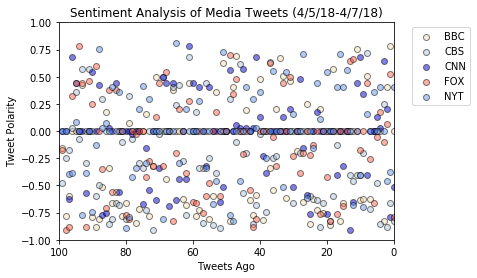

In [29]:
x_BBC = BBC['Relative_Tweet']
y_BBC = BBC['Compound Score']

x_CBS = CBS['Relative_Tweet']
y_CBS = CBS['Compound Score']

x_CNN = CNN['Relative_Tweet']
y_CNN = CNN['Compound Score']

x_FOX = FOX['Relative_Tweet']
y_FOX = FOX['Compound Score']

x_NYT = NYT['Relative_Tweet']
y_NYT = NYT['Compound Score']

plt.scatter(x_BBC,y_BBC,facecolors ="wheat",edgecolor ="black",alpha=0.5,label="BBC")
plt.scatter(x_CBS,y_CBS,facecolors ="lightsteelblue",edgecolor ="black",alpha=0.5,label="CBS")
plt.scatter(x_CNN,y_CNN,facecolors ="mediumblue",edgecolor ="black",alpha=0.5, label="CNN")
plt.scatter(x_FOX,y_FOX,facecolors ="tomato",edgecolor ="black",alpha=0.5, label="FOX")
plt.scatter(x_NYT,y_NYT,facecolors ="cornflowerblue",edgecolor ="black",alpha=0.5, label = "NYT")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlim(100,0)
plt.ylim(-1,1)

plt.title("Sentiment Analysis of Media Tweets (4/5/18-4/7/18)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

In [26]:
#to get the overall sentiment, groupby then take the mean

overall_news_df = news_df.groupby('Source Account')
overall_news_df = overall_news_df.mean()
overall_news_df = overall_news_df.reset_index()
overall_news_df

,Source Account,Compound Score,Negative Score,Neutral Score,Positive Score
0,BBCNews,-0.189852,0.15169,0.79537,0.05294
1,CBSNews,-0.209018,0.13719,0.81602,0.04674
2,CNN,-0.052345,0.07627,0.86550,0.05822
3,FoxNews,-0.106122,0.12941,0.80153,0.06905
4,nytimes,-0.021527,0.07469,0.86112,0.06415


Text(0,0.5,'Tweet Polarity')

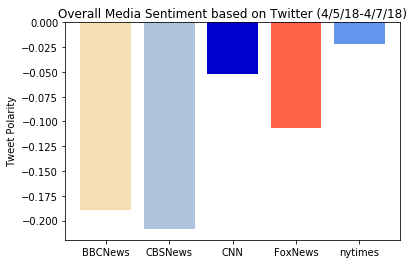

In [27]:
#plot overall sentiments

source = overall_news_df['Source Account']
x_axis = np.arange(len(source))
sentiment = overall_news_df['Compound Score']
colors = ["wheat","lightsteelblue","mediumblue","tomato","cornflowerblue"]

plt.bar(x_axis,sentiment,color=colors,align="edge")

tick_locations = [value + 0.4 for value in x_axis]
plt.xticks(tick_locations,source)

plt.title("Overall Media Sentiment based on Twitter (4/5/18-4/7/18)")
plt.ylabel("Tweet Polarity")


In [28]:
#Observable Trends - 
#1: CBS has the most negative compound overall sentiment
#2: Surprisingly all 5 news sources had negative compound overall sentiment 
#3: Fox news had the highest overall positive sentiment